# Assignment 9

**Import All Modules**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from typing import List
from typing import Tuple
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.svm import SVC

**Import Dataset**

In [123]:
# Import the main dataset

card = pd.read_csv("Credit_card.csv")

# Import the label dataset

label = pd.read_csv("Credit_card_label.csv")

# Merge the two dataframes

data = card.merge(label, on = "Ind_ID", how = "left")

# See the dataset

data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


**Assignment**


**Previous Cleaning**

In [124]:
# Turn relevant categorical values into numerical ones

def column_encoder(data: pd.DataFrame, columns: List[str]) -> pd.DataFrame: 
    
    labelencoder = preprocessing.LabelEncoder()
    
    for column in columns:
    
        data[column] = labelencoder.fit_transform(data[column])
    
    return data

encode_column = ["Car_Owner", "GENDER", "Propert_Owner", "Marital_status", "EDUCATION", "Housing_type", "Type_Occupation", "Type_Income"]

data = column_encoder(data, encode_column)

data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,18,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,18,2,1
2,5009746,0,1,0,0,315000.0,0,1,1,1,NaN,-586,1,1,1,0,18,2,1
3,5009749,0,1,0,0,NaN,0,1,1,1,-13557.0,-586,1,1,1,0,18,2,1
4,5009752,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,18,2,1


**Previous KNN**

In [125]:
def knn_model(data: pd.DataFrame, predicts: List[str], predicted: List[str], n_neighbors: int, test_size: float = 0.2, random_state: int = 42) -> Tuple[KNeighborsClassifier, float, str]:
    
    X = data[predicts]
    
    y = data[predicted]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

    sc = StandardScaler()

    X_train = sc.fit_transform(X_train) 

    X_test = sc.fit_transform(X_test)

    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    knn_score = knn.score(X_test, y_test)
    
    report = classification_report(y_test, y_pred)

    print("The model performance (accuracy) was:", knn_score)
    
    print("Classification Report:")

    print(report)

    return knn, knn_score, report

knn_model, accuracy, report = knn_model(data, ["Car_Owner", "Propert_Owner", "GENDER", "EDUCATION"], ["label"], n_neighbors = 8)

The model performance (accuracy) was: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310



c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Us

**Previous Logistic Regression**


In [126]:
def logistic_model(data: pd.DataFrame, predicts: List[str], predicted: List[str], test_size: float = 0.2, random_state: int = 42) -> Tuple[LogisticRegression, float]:
    
    X = data[predicts]
    
    y = data[predicted]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

    sc = StandardScaler()

    X_train = sc.fit_transform(X_train) 

    X_test = sc.fit_transform(X_test)
    
    regression = LogisticRegression(random_state = random_state)
   
    regression.fit(X_train, y_train)

    y_pred = regression.predict(X_test)

    regression_score = regression.score(X_test, y_test)

    print("The model performance (accuracy) was:", regression_score)

    return regression, regression_score

regression, regression_score = logistic_model(data, ["Car_Owner", "Propert_Owner", "GENDER", "EDUCATION"], ["label"])

The model performance (accuracy) was: 0.9032258064516129


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 1. (5 pts) Perform additional cleaning beyond what you did in Assignment 6. Specify the improvements you made.

In [127]:
# Turn relevant categorical values into numerical ones with null values being replaced my the mean

def column_encoder(data: pd.DataFrame, columns: List[str]) -> pd.DataFrame: 
    
    labelencoder = preprocessing.LabelEncoder()
    
    for column in columns:
    
        data[column] = labelencoder.fit_transform(data[column])

        data.fillna(data.mean(), inplace=True)

    return data

encode_column = ["Car_Owner", "GENDER", "Propert_Owner", "Marital_status", "EDUCATION", "Housing_type", "Type_Occupation", "Type_Income"]

data = column_encoder(data, encode_column)

data.fillna(data.mean(), inplace=True)

data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.00000,1,1,1,1,-18772.000000,365243,1,0,0,0,18,2,1
1,5009744,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,1,1,1,0,18,2,1
2,5009746,0,1,0,0,315000.00000,0,1,1,1,-16040.342071,-586,1,1,1,0,18,2,1
3,5009749,0,1,0,0,191399.32623,0,1,1,1,-13557.000000,-586,1,1,1,0,18,2,1
4,5009752,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,1,1,1,0,18,2,1


There is not much more cleaning that I was able to do; however, I added code that replaced the null values within the data set with the mean.

In [128]:
label_counts = data['label'].value_counts()
label_counts

label
0    1373
1     175
Name: count, dtype: int64

# 2. (8 pts) Perform combined, oversampling, or undersampling on the dataset you selected for Assignment 6. Explain why you chose what you did. How did this impact the results of your KNN and Logistic Regression?

In [129]:
# Apply both oversampling and undersampling

def apply_smoteenn(X: pd.DataFrame, y: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
    
    smoteenn = SMOTEENN(random_state=42)
    
    X_resampled, y_resampled = smoteenn.fit_resample(X, y)
    
    return X_resampled, y_resampled

**New KNN**

In [130]:
def knn_model(data: pd.DataFrame, predicts: List[str], predicted: List[str], n_neighbors: int = 5, test_size: float = 0.2, random_state: int = 42) -> Tuple[KNeighborsClassifier, float, str]:
    
    X = data[predicts]
    
    y = data[predicted].values.ravel()  # Flatten y if it’s a single column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Standardize features
    
    sc = StandardScaler()
    
    X_train = sc.fit_transform(X_train)
    
    X_test = sc.transform(X_test)

    # Apply SMOTEENN to the training data
    
    X_train, y_train = apply_smoteenn(X_train, y_train)

    # Initialize and train the k-NN model
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    knn.fit(X_train, y_train)

    # Predict and score the model
    
    y_pred = knn.predict(X_test)
    
    knn_score = knn.score(X_test, y_test)
  
    print("The model performance (accuracy):", knn_score)

    return knn, knn_score

# Example function call

knn_instance, accuracy = knn_model(data, ["Car_Owner", "Propert_Owner", "GENDER", "EDUCATION"], ["label"], n_neighbors=8)


The model performance (accuracy): 0.8516129032258064


In [131]:
def logistic_model(data: pd.DataFrame, predicts: List[str], predicted: List[str], test_size: float = 0.2, random_state: int = 32) -> Tuple[LogisticRegression, float, str]:
    
    X = data[predicts]
    
    y = data[predicted].values.ravel()  # Flatten y if it’s a single column

    # Split data into train and test sets
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Standardize features
    
    sc = StandardScaler()
    
    X_train = sc.fit_transform(X_train)
    
    X_test = sc.transform(X_test)

    # Apply SMOTEENN to the training data
    
    X_train, y_train = apply_smoteenn(X_train, y_train)

    # Initialize and train the logistic regression model
    
    regression = LogisticRegression(random_state=random_state)
    
    regression.fit(X_train, y_train)

    # Predict and score the model
    
    y_pred = regression.predict(X_test)
    
    regression_score = regression.score(X_test, y_test)

    # Printing model performance - temporarily replace print with logging or comments if needed
    
    print("The model performance (accuracy):", regression_score)

    return regression, regression_score

# Call Function

regression, regression_score = logistic_model(data, ["Car_Owner", "Propert_Owner", "GENDER", "EDUCATION"], ["label"])


The model performance (accuracy): 0.8451612903225807


I chose to use SMOTEENN for this situation, because SMOTEENN provides a balance between oversampling and undersampling. Since I wanted to reduce class imbalances while also keeping data quality high, SMOTEENN helps by oversampling to balance classes and ENN to remove noisy samples. After comparing the results for both KNN and Logistic Regression, the accuracy score dropped after applying SMOTEENN. The KNN and logistic regression accuracy likely decreased after applying SMOTEENN because it altered the dataset by adding synthetic minority samples and removing some majority samples. This can make the classes more balanced but may also remove "easy" majority samples that helped the model classify accurately before. As a result, your models now face a more challenging decision boundary, which can reduce accuracy, especially if the models were previously overfitting to the majority class.

# 3. (3 pts) Create an ROC Curve for the model and calculate the AUC.

In [132]:
def knn_model(data: pd.DataFrame,predicts: List[str],predicted: List[str],n_neighbors: int = 5,test_size: float = 0.2,random_state: int = 42) -> Tuple[KNeighborsClassifier, float, str, np.ndarray, np.ndarray]:
    
    X = data[predicts]
    
    y = data[predicted].values.ravel()  # Flatten y if it’s a single column
    
    # Split data into train and test sets
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Standardize features
    
    sc = StandardScaler()
    
    X_train = sc.fit_transform(X_train)
    
    X_test = sc.transform(X_test)
    
    # Initialize and train the k-NN model
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    knn.fit(X_train, y_train)
    
    # Predict classes and probabilities for ROC curve
    
    y_pred = knn.predict(X_test)
    
    y_probs = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Accuracy and classification report
    
    knn_score = knn.score(X_test, y_test)
    
    return knn, knn_score, y_test, y_probs

# Call Function

knn_instance, accuracy, y_test, y_probs = knn_model(data, ["Car_Owner", "GENDER", "EDUCATION"], ["label"], n_neighbors=8)


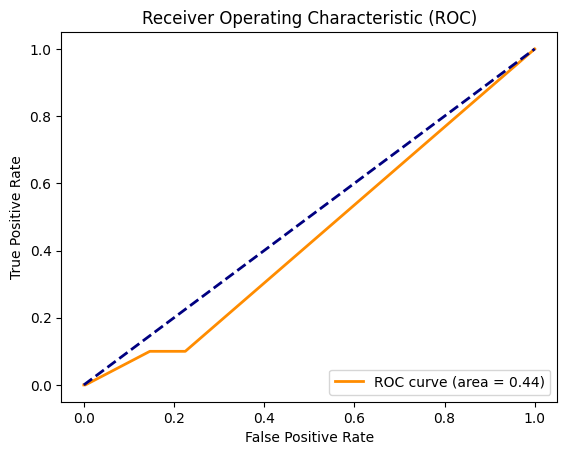

ROC AUC: 0.4412500000000001


In [133]:
# Plot ROC curve and calculate AUC
def plot_roc_curve(y_test: np.ndarray, y_probs: np.ndarray) -> float:
    
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.xlabel('False Positive Rate')
    
    plt.ylabel('True Positive Rate')
    
    plt.title('Receiver Operating Characteristic (ROC)')
    
    plt.legend(loc="lower right")
    
    plt.show()
    
    return roc_auc

# Calculate and print the ROC AUC

roc_auc = plot_roc_curve(y_test, y_probs)

print(f"ROC AUC: {roc_auc}")

# 4. (7 pts) Perform a linear SVM to predict the result from your dataset.

In [134]:
def linear_svm_model(data: pd.DataFrame, target_column: str = 'label', predictors: list = ["Car_Owner", "GENDER", "EDUCATION"], test_size: float = 0.3, random_state: int = 42) -> None:
    
    # Separate features and target variable
    
    X = data[predictors]
    
    y = data[target_column]
    
    # Split data into training and test sets
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Standardize features
    
    scaler = StandardScaler()
    
    X_train = scaler.fit_transform(X_train)
    
    X_test = scaler.transform(X_test)
    
    # Initialize and train the linear SVM model
    
    classifier = SVC(kernel='linear', random_state=random_state)
    
    classifier.fit(X_train, y_train)
    
    # Predict and evaluate the model
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    class_report = classification_report(y_test, y_pred)
    
    # Print results
    
    print(f"Accuracy: {accuracy:.4f}")
    
    print("Classification Report:")
    
    print(class_report)

# Call the function with the dataset

linear_svm_model(data)


Accuracy: 0.9075
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The model has high accuracy due to strong performance on the majority class, but it completely fails to identify instances of the minority class. This issue is common in imbalanced datasets. The model is not learning enough about the minority class to generalize well on it which could be an issue if it is required for an application.

# 5. (2 pts) What is outlier detection? Why is it important? What methods can you use for outlier detection?


Outlier detection is the process of identifying data points that significantly differ from the majority of a dataset, often due to errors, variability in measurement, or rare events. It is important because outliers can skew analysis results, lead to inaccurate models, and obscure true patterns within the data. Methods for outlier detection include statistical techniques like Z-scores and the interquartile range (IQR), distance-based methods such as k-nearest neighbors, clustering algorithms, and machine learning approaches like One-Class SVM and Isolation Forests.